# RandomForest

In [1]:
import pandas as pd


In [57]:
df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, 
                names = ['column_index', 'column_name'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_index  561 non-null    int64 
 1   column_name   561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [50]:
len(df.column_name.unique())

477

In [2]:
def get_new_name(df):
    df['dup_cnt']= df.groupby('column_name').cumcount()
    df['new_name'] = df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                     if x[1] >0 else x[0], axis =1)
    return df

In [55]:
df = get_new_name(df)
len(df.new_name.unique())

561

In [3]:
def get_human_dataset():
    df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, 
                names = ['column_index', 'column_name'])
    new_df = get_new_name(df) 
    feature_name = new_df.iloc[:, -1].values.tolist()
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+',names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+',names=feature_name)
    
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None, names=['action'])

    return X_train, X_test, y_train, y_test 


In [30]:
# split, fit, predict

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf = RandomForestClassifier(random_state=30)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('accuracy:', f'{accuracy:.4f}')

accuracy: 0.9230


In [21]:
rf.min_samples_split

2

In [22]:
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators': [100], # number of trees
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' :[2, 5, 8, 12],
    'min_samples_split' : [2, 5, 8, 16]
}

rf = RandomForestClassifier(random_state=30, n_jobs = -1)
grid_cv = GridSearchCV(rf, param_grid =params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('best params: ', grid_cv.best_params_)
print('best score: ', grid_cv.best_score_)

best params:  {'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
best score:  0.9149891186071817


In [23]:
# apply tuned-hyperparameters

rf_best = RandomForestClassifier(random_state=30, n_estimators=300, max_depth=12, min_samples_leaf=5,
                                min_samples_split=2)
rf_best.fit(X_train, y_train)
pred = rf_best.predict(X_test)
accuracy_score(y_test, pred)

0.9280624363759755

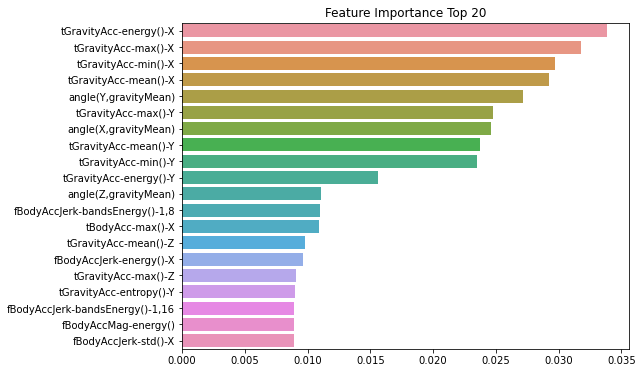

In [27]:
# feature importance visualization 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_imp_values = rf_best.feature_importances_
ftr_top20 = ftr_imp.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()